## Importing Libraries

In [21]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten

## Read data

In [2]:
data=h5py.File(r'C:\Users\zafreen\Desktop\Zoha\BDF\JanBDF data\Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

Create 'X_test', 'X_train','y_test', 'y_train'

In [3]:
print(data.keys())
Xtrain=data['X_train'][:]
Xtest=data['X_test'][:]
ytrain=data['y_train'][:]
ytest=data['y_test'][:]

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


## Scale and categorize data

In [4]:
print(Xtrain.shape)
print(Xtest.shape)
X_train = Xtrain.reshape(Xtrain.shape[0], 1024, 1)
X_test = Xtest.reshape(Xtest.shape[0], 1024, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0 
print(X_train.shape)
print(X_test.shape)
Ytrain = to_categorical(ytrain)
Ytest = to_categorical(ytest)

(42000, 32, 32)
(18000, 32, 32)
(42000, 1024, 1)
(18000, 1024, 1)


In [5]:
print(Xtrain)
print(ytrain)

[[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]

 [[123.125  125.8581 122.0757 ... 123.5747 124.1186 123.3144]
  [121.1683 124.1294 117.4613 ... 115.6078 119.5751 122.8306]
  [124.6132 121.1019 109.6623 ... 111.1783 119.7923 124.7595]
  ...
  [135.1391 127.3679 117.754  ...  95.0919 105.5

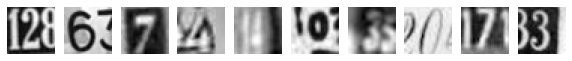

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [6]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(Xtrain[i], cmap="gray")
    plt.axis('off')
plt.show()
(ytrain[0:10])

## Neural Network Model

In [7]:
def Neural_Network():
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [13]:
a=Neural_Network()
a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
training_history = a.fit(X_train, Ytrain, validation_data=(X_test, Ytest), epochs=100, batch_size=300)

Epoch 1/100
140/140 [==============================] - 3s 14ms/step - loss: 2.2760 - accuracy: 0.1268 - val_loss: 2.1644 - val_accuracy: 0.1731
Epoch 2/100
140/140 [==============================] - 2s 11ms/step - loss: 2.0756 - accuracy: 0.2331 - val_loss: 1.9314 - val_accuracy: 0.2988
Epoch 3/100
140/140 [==============================] - 2s 13ms/step - loss: 1.7330 - accuracy: 0.3946 - val_loss: 1.5498 - val_accuracy: 0.4657
Epoch 4/100
140/140 [==============================] - 2s 12ms/step - loss: 1.4823 - accuracy: 0.4972 - val_loss: 1.3984 - val_accuracy: 0.5364
Epoch 5/100
140/140 [==============================] - 2s 13ms/step - loss: 1.3577 - accuracy: 0.5510 - val_loss: 1.3603 - val_accuracy: 0.5408
Epoch 6/100
140/140 [==============================] - 2s 12ms/step - loss: 1.2889 - accuracy: 0.5785 - val_loss: 1.2728 - val_accuracy: 0.5862
Epoch 7/100
140/140 [==============================] - 2s 11ms/step - loss: 1.2220 - accuracy: 0.6077 - val_loss: 1.1570 - val_accuracy:

140/140 [==============================] - 2s 12ms/step - loss: 0.5284 - accuracy: 0.8368 - val_loss: 0.6733 - val_accuracy: 0.8048
Epoch 58/100
140/140 [==============================] - 2s 12ms/step - loss: 0.5249 - accuracy: 0.8359 - val_loss: 0.6499 - val_accuracy: 0.8101
Epoch 59/100
140/140 [==============================] - 2s 12ms/step - loss: 0.5268 - accuracy: 0.8349 - val_loss: 0.6984 - val_accuracy: 0.7966
Epoch 60/100
140/140 [==============================] - 2s 11ms/step - loss: 0.5258 - accuracy: 0.8365 - val_loss: 0.6567 - val_accuracy: 0.8097
Epoch 61/100
140/140 [==============================] - 2s 12ms/step - loss: 0.5069 - accuracy: 0.8442 - val_loss: 0.6607 - val_accuracy: 0.8088
Epoch 62/100
140/140 [==============================] - 2s 11ms/step - loss: 0.5212 - accuracy: 0.8395 - val_loss: 0.6980 - val_accuracy: 0.7956
Epoch 63/100
140/140 [==============================] - 2s 13ms/step - loss: 0.5109 - accuracy: 0.8414 - val_loss: 0.6872 - val_accuracy: 0.799

In [9]:
scores = a.evaluate(X_test, Ytest, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6896066069602966
Accuracy: 0.8079444169998169


## Calculate  train v/s test loss and accuracy

<Figure size 432x288 with 0 Axes>

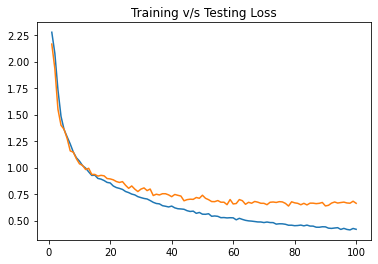

<Figure size 432x288 with 0 Axes>

In [14]:
training_loss=training_history.history['loss']
testing_loss=training_history.history['val_loss']
epochs=range(1,101)
plt.plot  ( epochs, training_loss, label = 'Training Loss' )
plt.plot  ( epochs, testing_loss, label = 'Testing Loss' )
plt.title ('Training v/s Testing Loss')
plt.figure()

<Figure size 432x288 with 0 Axes>

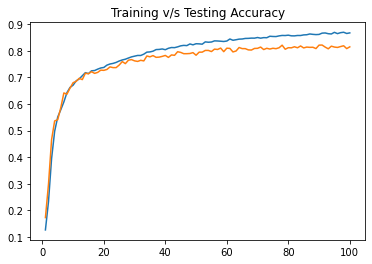

<Figure size 432x288 with 0 Axes>

In [15]:
training_acc=training_history.history['accuracy']
testing_acc=training_history.history['val_accuracy']
epochs=range(1,101)
plt.plot  ( epochs, training_acc, label = 'Training Accuracy' )
plt.plot  ( epochs, testing_acc, label = 'Testing Accuracy' )
plt.title ('Training v/s Testing Accuracy')
plt.figure()

## Pickle and Load model for future use

In [17]:
a.save_weights("Model1_weights.h5")
Model_1=a.to_json()
with open("Model_1","w") as file:
    file.write(Model_1)  

In [22]:
file=open("Model_1",'r')
model1=file.read()
file.close()
loaded_model=model_from_json(model1)
loaded_model.load_weights("Model1_weights.h5")

In [29]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,Ytest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*10))

accuracy: 0.87%
